In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
#download file from Cloud object storage
Bucket='****'
client_****.download_file(Bucket,Key='DataFromNoteBookQ2_cos.pkl',Filename='./DataFromNoteBookQ2_local.pkl')

df_complaints = pd.read_pickle('./DataFromNoteBookQ2_local.pkl')
df_complaints.tail()

created_date  unique_key incident_zip       incident_address  \
5643992 2018-12-30 05:59:21    41344560        10459     1050 LOWELL STREET   
5644037 2018-12-31 22:41:54    41344749        10467  3225 OLINVILLE AVENUE   
5646658 2018-12-31 19:28:48    41359636        10472  1725 EAST  172 STREET   
5647932 2018-12-31 19:24:07    41365381        10473    880 THIERIOT AVENUE   
5650318 2018-12-13 13:22:23    41376105        10453    69 WEST  182 STREET   

              street_name borough             latitude            longitude  \
5643992     LOWELL STREET   BRONX               40.826              -73.887   
5644037  OLINVILLE AVENUE   BRONX               40.872              -73.868   
5646658  EAST  172 STREET   BRONX               40.832              -73.870   
5647932   THIERIOT AVENUE   BRONX               40.823              -73.862   
5650318  WEST  182 STREET   BRONX               40.858              -73.907   

                closed_date                delay  created_year  created_month  
5643992 2019-01-04 15:10:29              129.000          2018             12  
5644037 2019-01-04 02:05:28               75.000          2018             12  
5646658 2019-01-07 10:50:37              159.000          2018             12  
5647932 2019-01-07 10:05:20              158.000          2018             12  
5650318 2019-01-08 18:38:07              629.000          2018             12



Please note all the modifications we have done previously to the complaints dataframe.

We are considering only Heating complaints

We are considering complaints from the Bronx borough

We have removed data older than 2014 and from 2019

We have removed columns that don't add value

We have included a column with the average delay to close complaints

We have included columns with the year and month of creation of each complaint

We removed duplicate complaints (complaints which included the word duplicate in their description)


In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Borough  Block  Lot   CD               CT2010               CB2010  \
0      BX   2260    1  201               19.000            1,022.000   
1      BX   2260    4  201               19.000            1,022.000   
2      BX   2260   10  201               19.000            1,022.000   
3      BX   2260   17  201               19.000            1,022.000   
4      BX   2260   18  201               19.000            1,022.000   

            SchoolDist              Council              ZipCode FireComp  \
0                7.000                8.000           10,454.000     L029   
1                7.000                8.000           10,454.000     L029   
2                7.000                8.000           10,454.000     L029   
3                7.000                8.000           10,454.000     L029   
4                7.000                8.000           10,454.000     L029   

            PolicePrct  HealthCenterDistrict           HealthArea  \
0               40.000                23.000            4,700.000   
1               40.000                23.000            4,700.000   
2               40.000                23.000            4,700.000   
3               40.000                23.000            4,700.000   
4               40.000                23.000            4,700.000   

             SanitBoro        SanitDistrict SanitSub                 Address  \
0                2.000                1.000       2A  122 BRUCKNER BOULEVARD   
1                2.000                1.000       2A  126 BRUCKNER BOULEVARD   
2                2.000                1.000       2A  138 BRUCKNER BOULEVARD   
3                2.000                1.000       2A  144 BRUCKNER BOULEVARD   
4                2.000                1.000       2A  148 BRUCKNER BOULEVARD   

  ZoneDist1 ZoneDist2 ZoneDist3 ZoneDist4 Overlay1 Overlay2 SPDist1  \
0  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   
1  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   
2  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   
3  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   
4  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   

               SPDist2              SPDist3            LtdHeight SplitZone  \
0                  nan                  nan                  nan         N   
1                  nan                  nan                  nan         N   
2                  nan                  nan                  nan         N   
3                  nan                  nan                  nan         N   
4                  nan                  nan                  nan         N   

  BldgClass              LandUse  Easements OwnerType              OwnerName  \
0        Z9                  nan          0       NaN  122 BRUCKNER PARTNERS   
1        G5                7.000          0       NaN  24 INDIAN HEAD HOLDIN   
2        F5                6.000          0         P            ANJOST CORP   
3        C1                2.000          0       NaN       144 BRUCKNER LLC   
4        C7                2.000          0         P       148 BRUCKNER LLC   

   LotArea  BldgArea  ComArea  ResArea  OfficeArea  RetailArea  GarageArea  \
0    15000         0        0        0           0           0           0   
1    13770       752      752        0         272           0           0   
2    35000     39375    39375        0           0           0           0   
3     2500     12500        0    12500           0           0           0   
4     1875      8595     1719     6876           0        1719           0   

   StrgeArea  FactryArea  OtherArea  AreaSource  NumBldgs  \
0          0           0          0           7         1   
1        480           0          0           2         2   
2          0       39375          0           2         1   
3          0           0          0           2         1   
4          0           0          0           2         1  

In [4]:
df_pluto.shape

(89854, 87)

In [5]:
#Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.
columns=['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
         'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'YCoord', 'XCoord']
df_pluto2=df_pluto[columns]
df_pluto2.shape

(89854, 19)

In [6]:
#in order to merge both datasets, we group the first by address:
df_heat_addr = df_complaints.groupby(['incident_address','latitude','longitude','incident_zip'],as_index=False).\
    agg({"unique_key":"count","delay":"mean"}) 
df_heat_addr.columns = ["addr","lat","lng","zip","amount","av_delay"]
df_comp_addr = df_heat_addr[df_heat_addr['amount']>0][['addr','lat','lng','zip', 'amount','av_delay']].sort_values(by='amount', ascending=False)
df_comp_addr.head()

addr                  lat  \
12825             3810 BAILEY AVENUE               40.884   
269              1025 BOYNTON AVENUE               40.825   
18150            888 GRAND CONCOURSE               40.827   
6726             2074 WALLACE AVENUE               40.853   
5630   1841 DR M L KING JR BOULEVARD               40.852   

                       lng    zip  amount             av_delay  
12825              -73.898  10463    3681               38.444  
269                -73.877  10472    1464               29.378  
18150              -73.923  10451     833               92.289  
6726               -73.865  10462     610               53.484  
5630               -73.914  10453     531               65.646

In [7]:
left_merge=pd.merge(df_pluto2,df_comp_addr,left_on='Address',right_on='addr',how='left',indicator=True)
left_merge.shape

(90657, 26)

In [8]:
left_merge.head()

Address  BldgArea            BldgDepth             BuiltFAR  \
0  122 BRUCKNER BOULEVARD         0                0.000                0.000   
1  126 BRUCKNER BOULEVARD       752               16.000                0.050   
2  138 BRUCKNER BOULEVARD     39375              200.000                1.130   
3  144 BRUCKNER BOULEVARD     12500               85.000                5.000   
4  148 BRUCKNER BOULEVARD      8595               70.000                4.580   

               CommFAR             FacilFAR  Lot  LotArea  \
0                5.000                6.500    1    15000   
1                5.000                6.500    4    13770   
2                5.000                6.500   10    35000   
3                5.000                6.500   17     2500   
4                5.000                6.500   18     1875   

              LotDepth  NumBldgs            NumFloors  OfficeArea  ResArea  \
0              200.000         1                0.000           0        0   
1              100.000         2                1.000         272        0   
2              200.000         1                2.000           0        0   
3              100.000         1                5.000           0    12500   
4               75.000         1                5.000           0     6876   

              ResidFAR  RetailArea  YearBuilt  YearAlter1  \
0                6.020           0          0           0   
1                6.020           0       1931        1994   
2                6.020           0       1931           0   
3                6.020           0       1931        2001   
4                6.020        1719       1920        2009   

                YCoord               XCoord                    addr  \
0          232,162.000        1,005,957.000                     NaN   
1          232,156.000        1,006,076.000                     NaN   
2          232,036.000        1,006,187.000                     NaN   
3          232,033.000        1,006,299.000  144 BRUCKNER BOULEVARD   
4          232,040.000        1,006,363.000  148 BRUCKNER BOULEVARD   

                   lat                  lng    zip               amount  \
0                  nan                  nan    NaN                  nan   
1                  nan                  nan    NaN                  nan   
2                  nan                  nan    NaN                  nan   
3               40.804              -73.920  10454                2.000   
4               40.804              -73.920  10454                2.000   

              av_delay     _merge  
0                  nan  left_only  
1                  nan  left_only  
2                  nan  left_only  
3              130.000       both  
4               60.000       both

In [9]:
left_merge['amount']=left_merge['amount'].fillna(0) #fill missing values with 0

In [10]:
left_merge.head()

Address  BldgArea            BldgDepth             BuiltFAR  \
0  122 BRUCKNER BOULEVARD         0                0.000                0.000   
1  126 BRUCKNER BOULEVARD       752               16.000                0.050   
2  138 BRUCKNER BOULEVARD     39375              200.000                1.130   
3  144 BRUCKNER BOULEVARD     12500               85.000                5.000   
4  148 BRUCKNER BOULEVARD      8595               70.000                4.580   

               CommFAR             FacilFAR  Lot  LotArea  \
0                5.000                6.500    1    15000   
1                5.000                6.500    4    13770   
2                5.000                6.500   10    35000   
3                5.000                6.500   17     2500   
4                5.000                6.500   18     1875   

              LotDepth  NumBldgs            NumFloors  OfficeArea  ResArea  \
0              200.000         1                0.000           0        0   
1              100.000         2                1.000         272        0   
2              200.000         1                2.000           0        0   
3              100.000         1                5.000           0    12500   
4               75.000         1                5.000           0     6876   

              ResidFAR  RetailArea  YearBuilt  YearAlter1  \
0                6.020           0          0           0   
1                6.020           0       1931        1994   
2                6.020           0       1931           0   
3                6.020           0       1931        2001   
4                6.020        1719       1920        2009   

                YCoord               XCoord                    addr  \
0          232,162.000        1,005,957.000                     NaN   
1          232,156.000        1,006,076.000                     NaN   
2          232,036.000        1,006,187.000                     NaN   
3          232,033.000        1,006,299.000  144 BRUCKNER BOULEVARD   
4          232,040.000        1,006,363.000  148 BRUCKNER BOULEVARD   

                   lat                  lng    zip               amount  \
0                  nan                  nan    NaN                0.000   
1                  nan                  nan    NaN                0.000   
2                  nan                  nan    NaN                0.000   
3               40.804              -73.920  10454                2.000   
4               40.804              -73.920  10454                2.000   

              av_delay     _merge  
0                  nan  left_only  
1                  nan  left_only  
2                  nan  left_only  
3              130.000       both  
4               60.000       both

In [11]:
print(left_merge.dtypes)

Address         object
BldgArea         int64
BldgDepth      float64
BuiltFAR       float64
CommFAR        float64
FacilFAR       float64
Lot              int64
LotArea          int64
LotDepth       float64
NumBldgs         int64
NumFloors      float64
OfficeArea       int64
ResArea          int64
ResidFAR       float64
RetailArea       int64
YearBuilt        int64
YearAlter1       int64
YCoord         float64
XCoord         float64
addr            object
lat            float64
lng            float64
zip             object
amount         float64
av_delay       float64
_merge        category
dtype: object


In [12]:
#drop rows with no coordinates
left_merge.dropna(subset = ['XCoord', 'YCoord'])
left_merge = left_merge[left_merge['YCoord'] > 0]
left_merge = left_merge[left_merge['XCoord'] > 0]

print(left_merge.shape)
print(left_merge.shape)

(87396, 26)
(87396, 26)


In [13]:
#convert relevant datatypes to integers
left_merge[['NumFloors']]=left_merge[['NumFloors']].astype(int)
left_merge[['amount']]=left_merge[['amount']].astype(int)
left_merge[['XCoord']]=left_merge[['XCoord']].astype(int)
left_merge[['YCoord']]=left_merge[['YCoord']].astype(int)


In [14]:
left_merge['last_improvement']=left_merge[['YearBuilt','YearAlter1']].max(axis=1)
#df["C"] = df[["A", "B"]].max(axis=1)

In [15]:
left_merge.describe()

BldgArea            BldgDepth             BuiltFAR  \
count           87,396.000           87,396.000           87,396.000   
mean             8,727.730               50.206                1.166   
std             67,106.771               30.597                1.822   
min                  0.000                0.000                0.000   
25%              1,668.000               35.000                0.590   
50%              2,292.000               45.000                0.880   
75%              3,360.000               56.670                1.290   
max         13,540,113.000            1,300.000              259.800   

                   CommFAR             FacilFAR                  Lot  \
count           87,396.000           87,396.000           87,396.000   
mean                 0.123                2.889              106.208   
std                  0.562                1.607              436.485   
min                  0.000                0.000                1.000   
25%                  0.000                2.000               20.000   
50%                  0.000                2.000               41.000   
75%                  0.000                4.800               72.000   
max                  9.000               10.000            7,505.000   

                   LotArea             LotDepth             NumBldgs  \
count           87,396.000           87,396.000           87,396.000   
mean             9,557.116              105.106                1.225   
std            297,949.022               63.399                1.948   
min                  0.000                0.000                0.000   
25%              2,200.000               95.000                1.000   
50%              2,521.000              100.000                1.000   
75%              4,281.000              102.250                1.000   
max         74,250,000.000            8,000.000              251.000   

                 NumFloors           OfficeArea              ResArea  \
count           87,396.000           87,396.000           87,396.000   
mean                 2.320              522.728            6,263.342   
std                  1.496           12,140.575           58,439.643   
min                  0.000                0.000                0.000   
25%                  2.000                0.000            1,220.000   
50%                  2.000                0.000            1,833.000   
75%                  3.000                0.000            2,680.000   
max                 44.000        1,311,800.000       13,211,398.000   

                  ResidFAR           RetailArea            YearBuilt  \
count           87,396.000           87,396.000           87,396.000   
mean                 1.707              366.995            1,866.157   
std                  1.320            4,985.086              380.462   
min                  0.000                0.000                0.000   
25%                  0.900                0.000            1,920.000   
50%                  1.250                0.000            1,931.000   
75%                  2.430                0.000            1,960.000   
max                 10.000          598,908.000            2,017.000   

                YearAlter1               YCoord               XCoord  \
count           87,396.000           87,396.000           87,396.000   
mean               186.138          249,944.970        1,021,599.859   
std                580.716            9,761.946            8,624.886   
min                  0.000          227,527.000        1,002,677.000   
25%                  0.000          241,911.000        1,014,138.000   
50%                  0.000          248,558.000        1,023,249.000   
75%                  0.000          257,976.000        1,027,088.000   
max              2,017.000          272,275.000        1,047,777.000   

                       lat                  lng               amount  \
count           14,202.000           14,202.000     

For us the target (dependant) variable Y is the Amount (of complaints), the independant variables X are all the rest

In [16]:
#left_merge.drop(['lat','lng','addr','_merge'],axis=1,inplace=True)
left_merge.drop(['addr','_merge'],axis=1,inplace=True)
print('remove unnecesary columns.Shape=',left_merge.shape)

remove unnecesary columns.Shape= (87396, 25)


In [17]:
left_merge.sort_values(by='amount',ascending=False,inplace=True)
left_merge.head()

Address  BldgArea            BldgDepth  \
24038   3810 BAILEY AVENUE     54001               92.000   
33349  1025 BOYNTON AVENUE     61500               87.000   
3982   888 GRAND CONCOURSE    122800              178.000   
47882  2074 WALLACE AVENUE    174400              200.000   
21822    30 BUCHANAN PLACE     45300               90.000   

                  BuiltFAR              CommFAR             FacilFAR  Lot  \
24038                2.530                0.000                4.800    7   
33349                4.990                0.000                4.800   54   
3982                 4.320                0.000                6.500   34   
47882                3.880                0.000                4.800    1   
21822                4.530                0.000                4.800   10   

       LotArea             LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
24038    21320              164.000         1          5           0    54000   
33349    12319              100.000         1          6           0    61500   
3982     28444              188.550         1          6        8000   111800   
47882    45000              200.000         1          6           0   174400   
21822    10000              100.000         1          5           0    45300   

                  ResidFAR  RetailArea  YearBuilt  YearAlter1  YCoord  \
24038                3.440           0       1925           0  261446   
33349                2.430           0       1931           0  239710   
3982                 6.020        3000       1931           0  240335   
47882                3.440           0       1965           0  249982   
21822                3.440           0       1924        1995  251862   

        XCoord                  lat                  lng    zip  amount  \
24038  1012722               40.884              -73.898  10463    3681   
33349  1018133               40.825              -73.877  10472    1464   
3982   1005800               40.827              -73.923  10451     833   
47882  1021763               40.853              -73.865  10462     610   
21822  1010351               40.858              -73.906  10453     527   

                  av_delay  last_improvement  
24038               38.444              1925  
33349               29.378              1931  
3982                92.289              1931  
47882               53.484              1965  
21822               44.004              1995

### Main concluding remarks from last question were: We identified importance of the different house features by means of Pearson coefficient and Random Forests :
### Residential Area, Number of Floors, Built Floor Area Ratio, Building Area, Building Depth, Year Built, Lot Area.

In [18]:
left_merge.shape

(87396, 25)

In [19]:
left_merge = left_merge[left_merge['YearBuilt'] > 0]
print(left_merge.shape)

(83928, 25)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
data_cols =['ResArea','NumFloors','BuiltFAR','BldgArea','BldgDepth','YearBuilt','LotArea',]

X = left_merge[data_cols]
y = left_merge.amount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test.values, y_predict)

0.8171094960085786

Let us create  a new features Building Age from YearBuilt and Building Alteration Age from Yearalter1

In [24]:
left_merge['bldg_age'] = left_merge.apply(lambda x: 2019-x['YearBuilt'] , axis=1)
left_merge['bldg_alt_age'] = left_merge.apply(lambda x: 2019-x['YearAlter1'] if x['YearAlter1']>0 else x['bldg_age'], axis=1)
print(left_merge.shape)

(83928, 27)


In [25]:
def cnt_range(cnt):
    if cnt <= 0:
        rng = 0
   # elif cnt <= 10 and cnt > 0:
    #    rng = 1
    #elif cnt <= 100 and cnt > 10:
     #   rng = 10
    #elif cnt > 100:
     #   rng = 100
    else:
        rng = 1
    return rng

In [26]:
left_merge['complaint_range'] = left_merge['amount'].apply(lambda x: cnt_range(x))
left_merge.shape

(83928, 28)

In [27]:
left_merge.groupby(['complaint_range']).count()

Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
complaint_range                                                              
0                  69777     69777      69777     69777    69777     69777   
1                  14151     14151      14151     14151    14151     14151   

                   Lot  LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  \
complaint_range                                                              
0                69777    69777     69777     69777      69777       69777   
1                14151    14151     14151     14151      14151       14151   

                 ResArea  ResidFAR  RetailArea  YearBuilt  YearAlter1  YCoord  \
complaint_range                                                                 
0                  69777     69777       69777      69777       69777   69777   
1                  14151     14151       14151      14151       14151   14151   

                 XCoord    lat    lng    zip  amount  av_delay  \
complaint_range                                                  
0                 69777      0      0      0   69777         0   
1                 14151  14151  14151  14151   14151     14151   

                 last_improvement  bldg_age  bldg_alt_age  
complaint_range                                            
0                           69777     69777         69777  
1                           14151     14151         14151

###  The above table clearly shows that roughly 80% of the addresses did not have any Heating related Complaints in 2017-2018

# Let's try now a KNN approach to model the data

In [28]:
#feats =['ResArea','NumFloors','BuiltFAR','BldgArea','BldgDepth','bldg_age','LotArea','YearAlter1']
response = 'complaint_range'
feats = left_merge.columns.tolist()
feats.remove(response)
feats.remove('amount')
feats.remove('Address')
feats.remove('YearBuilt')
feats.remove('YearAlter1')
feats.remove('zip')
feats.remove('av_delay')
feats.remove('lat')
feats.remove('lng')
#feats.remove('OfficeArea')
#feats.remove('CommFAR')
#feats.remove('RetailArea')
#feats.remove('NumBldgs')
X = left_merge[feats]
y = left_merge[response]

In [29]:
# we normalize features data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 6.574e-01,  1.349e+00,  7.168e-01, -2.068e-01,  1.214e+00,
        -2.256e-01,  3.977e-02,  1.110e+00, -1.357e-01,  1.785e+00,
        -4.382e-02,  7.976e-01,  1.335e+00, -7.477e-02,  1.167e+00,
        -1.061e+00, -7.489e-01,  6.150e-01,  7.486e-01],
       [ 7.671e-01,  1.180e+00,  2.053e+00, -2.068e-01,  1.214e+00,
        -1.182e-01,  1.010e-02, -8.168e-02, -1.357e-01,  2.475e+00,
        -4.382e-02,  9.234e-01,  5.600e-01, -7.477e-02, -1.063e+00,
        -4.273e-01, -5.661e-01,  4.130e-01,  5.657e-01],
       [ 1.663e+00,  4.271e+00,  1.689e+00, -2.068e-01,  2.286e+00,
        -1.639e-01,  6.326e-02,  1.567e+00, -1.357e-01,  2.475e+00,
         6.021e-01,  1.768e+00,  3.315e+00,  5.153e-01, -9.994e-01,
        -1.871e+00, -5.661e-01,  4.130e-01,  5.657e-01],
       [ 2.418e+00,  5.018e+00,  1.450e+00, -2.068e-01,  1.214e+00,
        -2.393e-01,  1.178e-01,  1.780e+00, -1.357e-01,  2.475e+00,
        -4.382e-02,  2.818e+00,  1.335e+00, -7.477e-02, -9.628e-03,
        -2.43

In [30]:
# already imported above 
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (67142, 19) (67142,)
Test set: (16786, 19) (16786,)


In [31]:
#import KNN library

from sklearn.neighbors import KNeighborsClassifier
#import accuracy metrics
from sklearn import metrics

In [32]:
k=22
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

y_hat=neigh.predict(X_test)

print("Train accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test accuracy:", metrics.accuracy_score(y_test,y_hat))


Train accuracy: 0.8881028268445981
Test accuracy: 0.8862742761825331


In [33]:
#let's try for different values of K (1 to 25)

Ks = 26
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.837, 0.87 , 0.866, 0.881, 0.877, 0.883, 0.882, 0.884, 0.883,
       0.886, 0.884, 0.886, 0.885, 0.886, 0.885, 0.886, 0.886, 0.887,
       0.887, 0.888, 0.887, 0.886, 0.886, 0.887, 0.886])

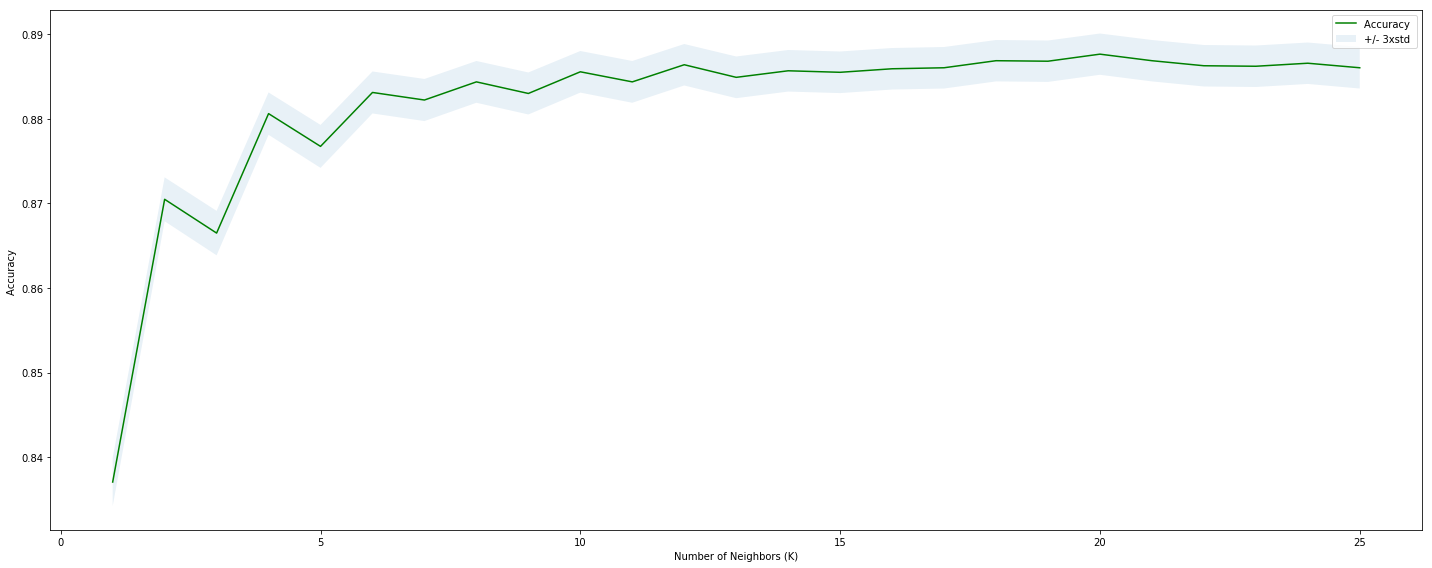

In [34]:
W=20
L=8
fig= plt.subplots(figsize=(W,L))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

We can see how a K value of 22 is already giving accuracy rates around its maximum.

We obtain an accuracy of around 0.885. This could seem quite good. However, to put this in perspective, let's remember that approximately, 80% of the addresses have 0 complaints, so for instance a model that by default assigns 0 complaints to all adresses would already be accurate on 80% of cases.

As a matter of fact, the most interesting metric in this case is the accuracy of the positive (i.e "will place a complaint") prediction. Let's see this in the confusion matrix

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[13561   412]
 [ 1497  1316]]
Normalized confusion matrix
[[0.47 0.53]
 [0.03 0.97]]


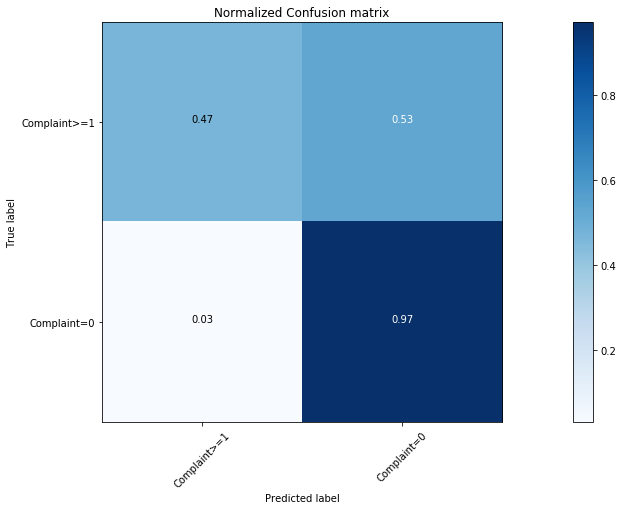

In [36]:
print(confusion_matrix(y_test, y_hat, labels=[0,1]))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix

W=20
L=7
fig= plt.subplots(figsize=(W,L))
plot_confusion_matrix(cnf_matrix, classes=['Complaint>=1','Complaint=0'],normalize= True,  title='Normalized Confusion matrix')

So we can see how the model is not as good as we expected to fit houses that placed complaints, although it is much better than a purely random approach 
### So in principle a model could be built using KNN to predict if at least one complaint will be placed at a given address in a 2 year period

## However, this model would be reasonably accurate to predict addresses that won't place complaints, but it's accuracy to predict addresses that would place complaints wouldn't be as good. 

## As we can see in the confusion matrix, we would be able to predict 43% of the addresses that will place complaints. On the other hand whenever we label an adress as a future complaint address we would be accurate on 77.8% of cases.


# Let's try now a Logistics Regression model to predict the probability that any given address will place at least one complaint over the next period of time

### Let's try first with the liblinear solver

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.03, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.03, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_hat = LR.predict(X_test)
y_hat_prob = LR.predict_proba(X_test)

In [39]:
from sklearn.metrics import jaccard_similarity_score
print("Jaccard score:", jaccard_similarity_score(y_test, y_hat))

Jaccard score: 0.8834147503872275


#### We can see how the accuracy is similar to KNN method as shown in the Confusion matrix below

Normalized confusion matrix
[[0.43 0.57]
 [0.02 0.98]]


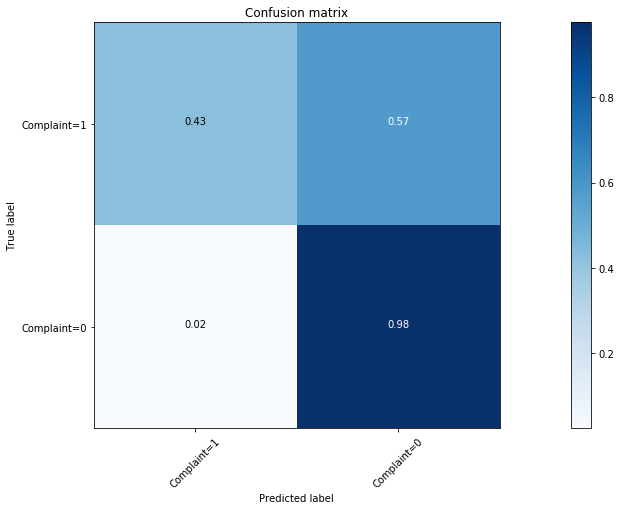

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
W=20
L=7
fig= plt.subplots(figsize=(W,L))
plot_confusion_matrix(cnf_matrix, classes=['Complaint=1','Complaint=0'],normalize= True,  title='Confusion matrix')

In [41]:
print (classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93     13973
           1       0.78      0.43      0.55      2813

   micro avg       0.88      0.88      0.88     16786
   macro avg       0.84      0.70      0.74     16786
weighted avg       0.87      0.88      0.87     16786



In [42]:
from sklearn.metrics import log_loss
y_hat_prob = LR.predict_proba(X_test)
print("Log loss:", log_loss(y_test, y_hat_prob))

Log loss: 0.32947792398195686


### Let's try now with other solvers.
###  First with saga solver

LogLoss: : 0.33
Normalized confusion matrix
[[0.43 0.57]
 [0.02 0.98]]


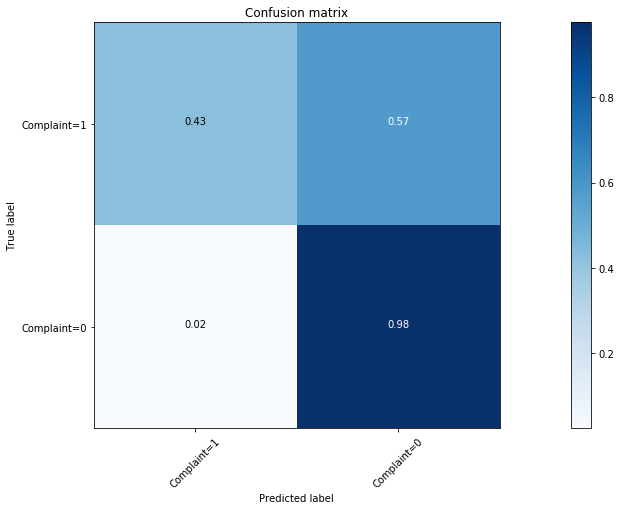

In [43]:
#other log regression solvers: newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

LR2 = LogisticRegression(C=0.03, solver='saga',max_iter=2000).fit(X_train,y_train)
y_hat2 = LR2.predict(X_test)    
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)



# Plot normalized confusion matrix
W=20
L=7
fig= plt.subplots(figsize=(W,L))
plot_confusion_matrix(cnf_matrix, classes=['Complaint=1','Complaint=0'],normalize= True,  title='Confusion matrix')

### And now with the lbfgs

LogLoss: : 0.33
Normalized confusion matrix
[[0.42 0.58]
 [0.02 0.98]]


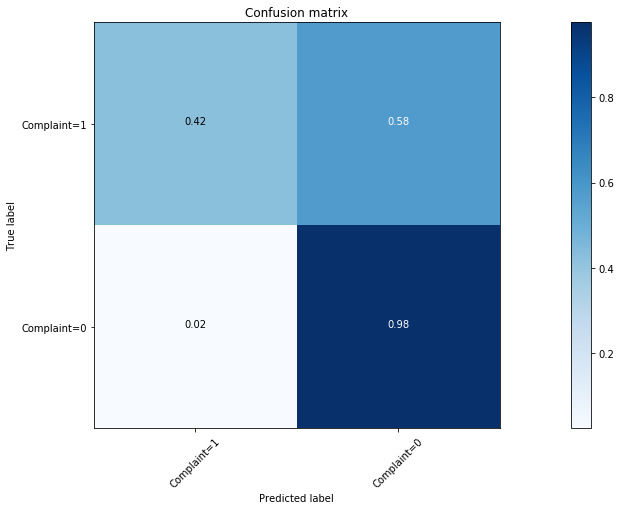

In [44]:
#other log regression solvers: newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

LR3 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
y_hat3 = LR3.predict(X_test)    
yhat_prob3 = LR3.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob3))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat3, labels=[1,0])
np.set_printoptions(precision=2)  

# Plot normalized confusion matrix
W=20
L=7
fig= plt.subplots(figsize=(W,L))
plot_confusion_matrix(cnf_matrix, classes=['Complaint=1','Complaint=0'],normalize= True,  title='Confusion matrix')

### W3 can see how using the sag solver or newton-cg, the performance is very similar:

### with the sag solver

In [45]:
LR4 = LogisticRegression(C=0.03, solver='sag',max_iter=900).fit(X_train,y_train)
    

yhat_prob4 = LR4.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob4))

LogLoss: : 0.33


### and finally with the newton-cg solver

In [46]:
LR5 = LogisticRegression(C=0.03, solver='newton-cg').fit(X_train,y_train)
    

yhat_prob5 = LR5.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob5))

LogLoss: : 0.33


# We can see how all of them give similar results and also how the level of accuracy in all of them is similar to the KNN method. So we can model the probability of an adress placing a complaint in the next two years
(we could do a similar model for a one year period).

Lets include now the probability given by the logistics regression model in the dataframe to look for further insights

In [47]:
#let's first add two year of age to all the buildings (We take as an hypothesis for the calculations that no alterations will be done to any house)
left_merge_future=left_merge[::]
left_merge_future['bldg_age'] = left_merge_future.apply(lambda x: 2021-x['YearBuilt'] , axis=1)
left_merge_future['bldg_alt_age'] = left_merge_future.apply(lambda x: 2021-x['YearAlter1'] if x['YearAlter1']>0 else x['bldg_age'], axis=1)
print(left_merge_future.shape)
(left_merge_future.head())

(83928, 28)


Address  BldgArea            BldgDepth  \
24038   3810 BAILEY AVENUE     54001               92.000   
33349  1025 BOYNTON AVENUE     61500               87.000   
3982   888 GRAND CONCOURSE    122800              178.000   
47882  2074 WALLACE AVENUE    174400              200.000   
21822    30 BUCHANAN PLACE     45300               90.000   

                  BuiltFAR              CommFAR             FacilFAR  Lot  \
24038                2.530                0.000                4.800    7   
33349                4.990                0.000                4.800   54   
3982                 4.320                0.000                6.500   34   
47882                3.880                0.000                4.800    1   
21822                4.530                0.000                4.800   10   

       LotArea             LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
24038    21320              164.000         1          5           0    54000   
33349    12319              100.000         1          6           0    61500   
3982     28444              188.550         1          6        8000   111800   
47882    45000              200.000         1          6           0   174400   
21822    10000              100.000         1          5           0    45300   

                  ResidFAR  RetailArea  YearBuilt  YearAlter1  YCoord  \
24038                3.440           0       1925           0  261446   
33349                2.430           0       1931           0  239710   
3982                 6.020        3000       1931           0  240335   
47882                3.440           0       1965           0  249982   
21822                3.440           0       1924        1995  251862   

        XCoord                  lat                  lng    zip  amount  \
24038  1012722               40.884              -73.898  10463    3681   
33349  1018133               40.825              -73.877  10472    1464   
3982   1005800               40.827              -73.923  10451     833   
47882  1021763               40.853              -73.865  10462     610   
21822  1010351               40.858              -73.906  10453     527   

                  av_delay  last_improvement  bldg_age  bldg_alt_age  \
24038               38.444              1925        96            96   
33349               29.378              1931        90            90   
3982                92.289              1931        90            90   
47882               53.484              1965        56            56   
21822               44.004              1995        97            26   

       complaint_range  
24038                1  
33349                1  
3982                 1  
47882                1  
21822                1

In [48]:
#now we calculate the probablity of heating related complaints in the future

X_future = left_merge_future[feats]

# we normalize features data
X_future = preprocessing.StandardScaler().fit(X_future).transform(X_future.astype(float))

yhat_prob = LR.predict_proba(X_future)

df_y_prob = pd.DataFrame(yhat_prob)
#yhat_prob
Prob_comp=df_y_prob[1].tolist()
left_merge_future['Prob_comp']=Prob_comp
left_merge_future.sample(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Address  BldgArea            BldgDepth  \
46592  2014 CONTINENTAL AVENUE      2000               50.000   
13058   1962 UNIVERSITY AVENUE     17100               96.000   
55113      3041 HOLLAND AVENUE     51040               88.000   
69502       4054 DURYEA AVENUE      2200               48.000   
16041      1321 BRISTOW STREET      1680               35.000   
85472   183 CITY ISLAND AVENUE      4485               65.000   
36408     1004 OLMSTEAD AVENUE      2290               51.670   
16706         1015 HOME STREET      1938               45.000   
77977          3293 AGAR PLACE      1678               47.000   
53636        2742 BOUCK AVENUE      1620               30.000   

                  BuiltFAR              CommFAR             FacilFAR  Lot  \
46592                0.750                0.000                2.000    7   
13058                2.010                0.000                4.800  119   
55113                4.380                0.000                4.800   34   
69502                0.580                0.000                2.000   60   
16041                1.010                0.000                4.800   50   
85472                1.900                0.000                1.000  288   
36408                0.830                0.000                2.000    4   
16706                0.950                0.000                4.800   32   
77977                0.230                0.000                1.000  328   
53636                0.900                0.000                2.000   22   

       LotArea             LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
46592     2681              107.250         1          2           0     2000   
13058     8500              193.920         1          5           0    17100   
55113    11660              100.000         1          5           0    51040   
69502     3800               37.420         1          2           0     2200   
16041     1667              100.000         1          2           0     1120   
85472     2358              100.000         1          3           0     4485   
36408     2775               70.000         1          2           0     2290   
16706     2040               81.330         1          2           0     1938   
77977     7258              145.170         2          1           0     1678   
53636     1800              100.000         1          2           0     1080   

                  ResidFAR  RetailArea  YearBuilt  YearAlter1  YCoord  \
46592                1.100           0       1920           0  249905   
13058                3.440           0       1914           0  250421   
55113                2.430           0       1929           0  256577   
69502                0.900           0       1960           0  264806   
16041                3.440           0       1920           0  242108   
85472                0.600           0       1925           0  246562   
36408                1.250           0       1987        2007  240788   
16706                3.440           0       1910           0  241325   
77977                0.500           0       1950           0  245137   
53636                0.900           0       1950           0  255036   

        XCoord                  lat                  lng    zip  amount  \
46592  1031445                  nan                  nan    NaN       0   
13058  1008729                  nan                  nan    NaN       0   
55113  1021445               40.870              -73.865  10467       7   
69502  1029575                  nan                  nan    NaN       0   
16041  1013291                  nan                  nan    NaN       0   
85472  1043646               40.843              -73.785  10464       2   
36408  1024975                  nan                  nan    NaN       0   
16706  1015063               40.829              -73.889  10459       1   
77977  1034382                  nan                  nan    NaN       0   
53636  102581

As  an interesting point of analysis, we can see according to the model how many of the addresses that din't placed complaints in the past will place them in the coming two years

In [49]:
def prob_range(cnt):
    if cnt <= 0.49999:
        rng = 0
    else:
        rng = 1
    return rng
left_merge_future['prob_range'] = left_merge_future['Prob_comp'].apply(lambda x: prob_range(x))
left_merge_future.shape
left_merge_future.groupby(['complaint_range','prob_range']).count()
#left_merge_future.groupby(['amount','complaint_range','Prob_comp'],as_index=False)

#df_heat_addr = df_complaints.groupby(['incident_address','latitude','longitude','incident_zip'],as_index=False).\
#    agg({"unique_key":"count","delay":"mean"}) 
#df_heat_addr.columns = ["addr","lat","lng","zip","amount","av_delay"]
#df_comp_addr = df_heat_addr[df_heat_addr['amount']>0][['addr','lat','lng','zip', 'amount','av_delay']].sort_values(by='amount', ascending=False)
#df_comp_addr.head()

Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  \
complaint_range prob_range                                                    
0               0             68253     68253      68253     68253    68253   
                1              1524      1524       1524      1524     1524   
1               0              8300      8300       8300      8300     8300   
                1              5851      5851       5851      5851     5851   

                            FacilFAR    Lot  LotArea  LotDepth  NumBldgs  \
complaint_range prob_range                                                 
0               0              68253  68253    68253     68253     68253   
                1               1524   1524     1524      1524      1524   
1               0               8300   8300     8300      8300      8300   
                1               5851   5851     5851      5851      5851   

                            NumFloors  OfficeArea  ResArea  ResidFAR  \
complaint_range prob_range                                             
0               0               68253       68253    68253     68253   
                1                1524        1524     1524      1524   
1               0                8300        8300     8300      8300   
                1                5851        5851     5851      5851   

                            RetailArea  YearBuilt  YearAlter1  YCoord  XCoord  \
complaint_range prob_range                                                      
0               0                68253      68253       68253   68253   68253   
                1                 1524       1524        1524    1524    1524   
1               0                 8300       8300        8300    8300    8300   
                1                 5851       5851        5851    5851    5851   

                             lat   lng   zip  amount  av_delay  \
complaint_range prob_range                                       
0               0              0     0     0   68253         0   
                1              0     0     0    1524         0   
1               0           8300  8300  8300    8300      8300   
                1           5851  5851  5851    5851      5851   

                            last_improvement  bldg_age  bldg_alt_age  \
complaint_range prob_range                                             
0               0                      68253     68253         68253   
                1                       1524      1524          1524   
1               0                       8300      8300          8300   
                1                       5851      5851          5851   

                            Prob_comp  
complaint_range prob_range             
0               0               68253  
                1                1524  
1               0                8300  
                1                5851

## We can say that at least 1500 addressess that didn't place complaints in the past two years will place them in the next two. Our accuracy for this prediction is 78% (our model recall % for class complaints>0) 

### Let's now plot this probability in a heatmap of future heating related complaints in the Bronx borough

In [50]:
#let's import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')
from folium import plugins
from folium.plugins import HeatMap

Solving environment: | Folium installed and imported!


We see how the PLUTO Dataset has no latitude or longitude coordinates and instead uses YCoord and XCoord. Let us convert these to Latitude and Longitude for eventual plot of data in maps.

We know from the last question submission that XCoord is highly correlated with lng (ρ = 0.9999303212) and YCoord is highly correlated with lat (ρ = 0.999766573), so we can use addresses with complaints which contain all of the 4 data to run linear regression and find the correspondende between both sets of coordinates

In [51]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
df=left_merge[['XCoord','YCoord','lng','lat']]
df.dropna(subset = ['XCoord', 'YCoord','lng','lat'])
df = df[df['YCoord'] > 0]
df = df[df['XCoord'] > 0]
df['XCoord'] = df['XCoord'] 
df['YCoord'] = df['YCoord'] 
df=df.head(10000)
x = np.asanyarray(df[['XCoord']])
y = np.asanyarray(df[['lng']])
regr.fit (x,y)
# The coefficients
print ('Longitude Coefficients: ', regr.coef_)
print ('Longitude Intercept: ',regr.intercept_)
x = np.asanyarray(df[['YCoord']])
y = np.asanyarray(df[['lat']])
regr.fit (x,y)
# The coefficients
print ('Latitude Coefficients: ', regr.coef_)
print ('Latitude Intercept: ',regr.intercept_)



Longitude Coefficients:  [[3.62e-06]]
Longitude Intercept:  [-77.56]
Latitude Coefficients:  [[2.74e-06]]
Latitude Intercept:  [40.17]


In [52]:
left_merge_future['lng_new']=-77.563+3.62e-06*left_merge_future['XCoord']
left_merge_future['lat_new']=40.168+2.74e-06*left_merge_future['YCoord']
left_merge_future.head()

Address  BldgArea            BldgDepth  \
24038   3810 BAILEY AVENUE     54001               92.000   
33349  1025 BOYNTON AVENUE     61500               87.000   
3982   888 GRAND CONCOURSE    122800              178.000   
47882  2074 WALLACE AVENUE    174400              200.000   
21822    30 BUCHANAN PLACE     45300               90.000   

                  BuiltFAR              CommFAR             FacilFAR  Lot  \
24038                2.530                0.000                4.800    7   
33349                4.990                0.000                4.800   54   
3982                 4.320                0.000                6.500   34   
47882                3.880                0.000                4.800    1   
21822                4.530                0.000                4.800   10   

       LotArea             LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
24038    21320              164.000         1          5           0    54000   
33349    12319              100.000         1          6           0    61500   
3982     28444              188.550         1          6        8000   111800   
47882    45000              200.000         1          6           0   174400   
21822    10000              100.000         1          5           0    45300   

                  ResidFAR  RetailArea  YearBuilt  YearAlter1  YCoord  \
24038                3.440           0       1925           0  261446   
33349                2.430           0       1931           0  239710   
3982                 6.020        3000       1931           0  240335   
47882                3.440           0       1965           0  249982   
21822                3.440           0       1924        1995  251862   

        XCoord                  lat                  lng    zip  amount  \
24038  1012722               40.884              -73.898  10463    3681   
33349  1018133               40.825              -73.877  10472    1464   
3982   1005800               40.827              -73.923  10451     833   
47882  1021763               40.853              -73.865  10462     610   
21822  1010351               40.858              -73.906  10453     527   

                  av_delay  last_improvement  bldg_age  bldg_alt_age  \
24038               38.444              1925        96            96   
33349               29.378              1931        90            90   
3982                92.289              1931        90            90   
47882               53.484              1965        56            56   
21822               44.004              1995        97            26   

       complaint_range            Prob_comp  prob_range              lng_new  \
24038                1                0.656           1              -73.897   
33349                1                0.869           1              -73.877   
3982                 1                0.931           1              -73.922   
47882                1                0.901           1              -73.864   
21822                1                0.839           1              -73.906   

                   lat_new  
24038               40.884  
33349               40.825  
3982                40.827  
47882               40.853  
21822               40.858

Let us see how the probability map looks

In [68]:
#let's create the heatmap of Bronx

# Make an empty map
BRla=40.83
BRlo=-73.91
br_ht_map=folium.Map(location=[BRla,BRlo],zoom_start=15,width=1700,height=800)
 
# extract lat, lon, and magnitude for the folium heatmap
hm_wide = HeatMap( list(zip(left_merge_future.lat_new.values, left_merge_future.lng_new.values,left_merge_future.Prob_comp.values*5)),min_opacity=0.001,max_val=10,radius=3.55, blur=1,max_zoom=10,gradient={.2: 'green', .4: 'yellow',.9: 'red'})
br_ht_map.add_child(hm_wide)
folium.LayerControl().add_to(br_ht_map)
br_ht_map

## This heatmap can be very useful to navigate through the adressess that are more likely to produce complaints in the following year(s). (red spots)
If needed, we can zoom further into a particular area of interest

## ALTERNATIVE PATH:Instead of modelling just a binary clasiffication (complaints vs no complaints). We could also try to model a multiclass model (i.e differentiate between the amount of complaints likely to be produced at different adressess)


To do so, let's create several new classes depending on the amount of complaints

In [55]:
def cnt_range(cnt):
    if cnt <= 0:
        rng = 0
    elif cnt <= 1 and cnt > 0:
        rng = 1
    elif cnt <= 5 and cnt > 1:
        rng = 5
    elif cnt <= 10 and cnt > 5:
        rng = 10    
    elif cnt <= 100 and cnt > 10:
        rng = 100
    elif cnt > 100:
        rng = 5000
    else:
        rng = 1
    return rng

In [56]:
left_merge['complaint_range'] = left_merge['amount'].apply(lambda x: cnt_range(x))
print(left_merge.shape)
left_merge.groupby(['complaint_range']).count()

(83928, 28)


Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
complaint_range                                                              
0                  69777     69777      69777     69777    69777     69777   
1                   4257      4257       4257      4257     4257      4257   
5                   4489      4489       4489      4489     4489      4489   
10                  1805      1805       1805      1805     1805      1805   
100                 3419      3419       3419      3419     3419      3419   
5000                 181       181        181       181      181       181   

                   Lot  LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  \
complaint_range                                                              
0                69777    69777     69777     69777      69777       69777   
1                 4257     4257      4257      4257       4257        4257   
5                 4489     4489      4489      4489       4489        4489   
10                1805     1805      1805      1805       1805        1805   
100               3419     3419      3419      3419       3419        3419   
5000               181      181       181       181        181         181   

                 ResArea  ResidFAR  RetailArea  YearBuilt  YearAlter1  YCoord  \
complaint_range                                                                 
0                  69777     69777       69777      69777       69777   69777   
1                   4257      4257        4257       4257        4257    4257   
5                   4489      4489        4489       4489        4489    4489   
10                  1805      1805        1805       1805        1805    1805   
100                 3419      3419        3419       3419        3419    3419   
5000                 181       181         181        181         181     181   

                 XCoord   lat   lng   zip  amount  av_delay  last_improvement  \
complaint_range                                                                 
0                 69777     0     0     0   69777         0             69777   
1                  4257  4257  4257  4257    4257      4257              4257   
5                  4489  4489  4489  4489    4489      4489              4489   
10                 1805  1805  1805  1805    1805      1805              1805   
100                3419  3419  3419  3419    3419      3419              3419   
5000                181   181   181   181     181       181               181   

                 bldg_age  bldg_alt_age  
complaint_range                          
0                   69777         69777  
1                    4257          4257  
5                    4489          4489  
10                   1805          1805  
100                  3419          3419  
5000                  181           181

In [57]:
response = 'complaint_range'
feats = left_merge.columns.tolist()
feats.remove(response)
feats.remove('amount')
feats.remove('Address')
feats.remove('YearBuilt')
feats.remove('YearAlter1')
feats.remove('zip')
feats.remove('av_delay')
feats.remove('lat')
feats.remove('lng')
#feats.remove('OfficeArea')
#feats.remove('CommFAR')
#feats.remove('RetailArea')
#feats.remove('NumBldgs')
X = left_merge[feats]
y = left_merge[response]

In [58]:
# we normalize features data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 6.57e-01,  1.35e+00,  7.17e-01, -2.07e-01,  1.21e+00, -2.26e-01,
         3.98e-02,  1.11e+00, -1.36e-01,  1.78e+00, -4.38e-02,  7.98e-01,
         1.33e+00, -7.48e-02,  1.17e+00, -1.06e+00, -7.49e-01,  6.15e-01,
         7.49e-01],
       [ 7.67e-01,  1.18e+00,  2.05e+00, -2.07e-01,  1.21e+00, -1.18e-01,
         1.01e-02, -8.17e-02, -1.36e-01,  2.48e+00, -4.38e-02,  9.23e-01,
         5.60e-01, -7.48e-02, -1.06e+00, -4.27e-01, -5.66e-01,  4.13e-01,
         5.66e-01],
       [ 1.66e+00,  4.27e+00,  1.69e+00, -2.07e-01,  2.29e+00, -1.64e-01,
         6.33e-02,  1.57e+00, -1.36e-01,  2.48e+00,  6.02e-01,  1.77e+00,
         3.31e+00,  5.15e-01, -9.99e-01, -1.87e+00, -5.66e-01,  4.13e-01,
         5.66e-01],
       [ 2.42e+00,  5.02e+00,  1.45e+00, -2.07e-01,  1.21e+00, -2.39e-01,
         1.18e-01,  1.78e+00, -1.36e-01,  2.48e+00, -4.38e-02,  2.82e+00,
         1.33e+00, -7.48e-02, -9.63e-03, -2.44e-03,  4.70e-01, -7.32e-01,
        -4.71e-01],
       [ 5.30e-01,  1.28e+00,  1

In [59]:
# already imported above 
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (67142, 19) (67142,)
Test set: (16786, 19) (16786,)


In [60]:
k=22
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

y_hat=neigh.predict(X_test)

print("Train accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test accuracy:", metrics.accuracy_score(y_test,y_hat))


Train accuracy: 0.8541449465312323
Test accuracy: 0.8513046586441082


In [61]:
#let's try for different values of K (1 to 25)

Ks = 26
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78, 0.83, 0.83, 0.84, 0.84, 0.84, 0.84, 0.84, 0.85, 0.85, 0.85,
       0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85,
       0.85, 0.85, 0.85])

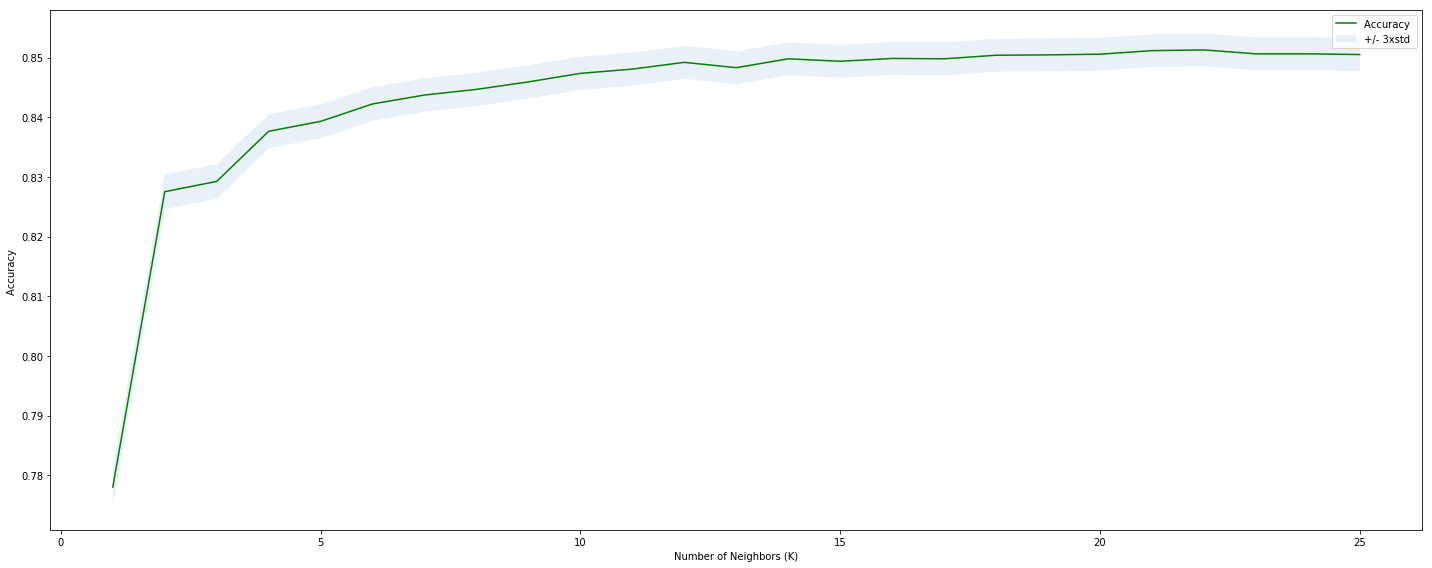

In [62]:
W=20
L=8
fig= plt.subplots(figsize=(W,L))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

As we see in the graph above in this case K=22 gives us also the highest accuracy, although lower than for the binary model (Accuracy was around 0.885)

[[13743    19    61     6   144     0]
 [  738     5    23     2    54     0]
 [  644     6    67     4   143     0]
 [  194     3    44     4   125     0]
 [  171     3    64    13   471     0]
 [    3     0     1     1    30     0]]
Normalized confusion matrix
[[9.84e-01 1.36e-03 4.37e-03 4.29e-04 1.03e-02 0.00e+00]
 [8.98e-01 6.08e-03 2.80e-02 2.43e-03 6.57e-02 0.00e+00]
 [7.45e-01 6.94e-03 7.75e-02 4.63e-03 1.66e-01 0.00e+00]
 [5.24e-01 8.11e-03 1.19e-01 1.08e-02 3.38e-01 0.00e+00]
 [2.37e-01 4.16e-03 8.86e-02 1.80e-02 6.52e-01 0.00e+00]
 [8.57e-02 0.00e+00 2.86e-02 2.86e-02 8.57e-01 0.00e+00]]


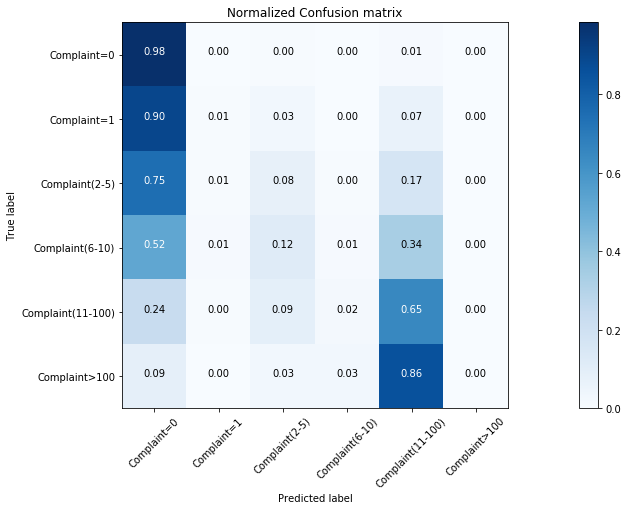

In [63]:
print(confusion_matrix(y_test, y_hat, labels=[0,1,5,10,100,5000]))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1,5,10,100,5000])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
W=20
L=7
fig= plt.subplots(figsize=(W,L))
plot_confusion_matrix(cnf_matrix, classes=['Complaint=0','Complaint=1','Complaint(2-5)','Complaint(6-10)', 'Complaint(11-100)','Complaint>100'],normalize= True,  title='Normalized Confusion matrix')

We can see how this model is more performant on addressess with big amount of complaints (more than 10), however for addresses with lower amount of complaints (below 5) will most frequently fail to predict future complaints
It predicts reasonably well houses with complaints between 11 and 100. It falls to predict houses that will place more than 100 complaints, however, it places them in the class inmediately lower, so if we group both classes we can have a pretty good prediction of a house placing more than 10 complaints

We could equally perform a Logistics Regression. this time we use the newton cg method which allows for MultiClass regression

In [64]:
from sklearn import linear_model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(X_train)))
print("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr.predict(X_test)))
yhat_prob = mul_lr.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))

Multinomial Logistic regression Train Accuracy ::  0.8472044323970094
Multinomial Logistic regression Test Accuracy ::  0.8502919099249374
LogLoss: : 0.53


[[13743    19    61     6   144     0]
 [  738     5    23     2    54     0]
 [  644     6    67     4   143     0]
 [  194     3    44     4   125     0]
 [  171     3    64    13   471     0]
 [    3     0     1     1    30     0]]
Normalized confusion matrix
[[9.84e-01 1.36e-03 4.37e-03 4.29e-04 1.03e-02 0.00e+00]
 [8.98e-01 6.08e-03 2.80e-02 2.43e-03 6.57e-02 0.00e+00]
 [7.45e-01 6.94e-03 7.75e-02 4.63e-03 1.66e-01 0.00e+00]
 [5.24e-01 8.11e-03 1.19e-01 1.08e-02 3.38e-01 0.00e+00]
 [2.37e-01 4.16e-03 8.86e-02 1.80e-02 6.52e-01 0.00e+00]
 [8.57e-02 0.00e+00 2.86e-02 2.86e-02 8.57e-01 0.00e+00]]


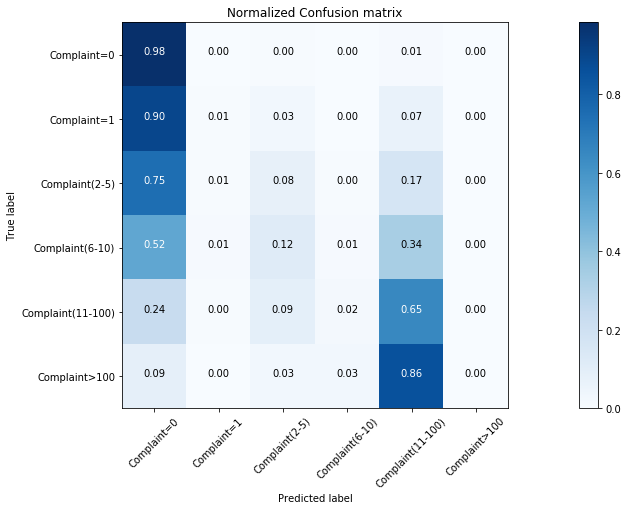

In [65]:
print(confusion_matrix(y_test, y_hat, labels=[0,1,5,10,100,5000]))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1,5,10,100,5000])
np.set_printoptions(precision=2)

# Plot normalized confusion matrix

W=20
L=7
fig= plt.subplots(figsize=(W,L))
plot_confusion_matrix(cnf_matrix, classes=['Complaint=0','Complaint=1','Complaint(2-5)','Complaint(6-10)', 'Complaint(11-100)','Complaint>100'],normalize= True,  title='Normalized Confusion matrix')

Obviously yhat probability will now have more columns accounting for the new classes

In [66]:
print (classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93     13973
           1       0.14      0.01      0.01       822
           5       0.26      0.08      0.12       864
          10       0.13      0.01      0.02       370
         100       0.49      0.65      0.56       722
        5000       0.00      0.00      0.00        35

   micro avg       0.85      0.85      0.85     16786
   macro avg       0.32      0.29      0.27     16786
weighted avg       0.78      0.85      0.81     16786



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
y_hat_prob = mul_lr.predict_proba(X_test)
df_y_prob2 = pd.DataFrame(yhat_prob)
df_y_prob2.head()

0                    1                    2  \
0                0.943                0.028                0.021   
1                0.967                0.018                0.012   
2                0.937                0.028                0.025   
3                0.837                0.074                0.057   
4                0.873                0.050                0.045   

                     3                    4                    5  
0                0.005                0.004                0.000  
1                0.002                0.001                0.000  
2                0.006                0.004                0.000  
3                0.020                0.012                0.000  
4                0.014                0.017                0.001

# CONCLUDING REMARKS: 
# - A binary model is developed using logistics regression to predict the probability of future heating related complaints.  Although the model accuracy is not extremely high, it is a significant improvement over a random approach. 
# The binary model will tell us the probability of receiving complaints for any given address (without specifying how many) with a precision of 0.78 and a recall of 0.43. A heatmap tool is developed to plot the probabilities of a given address placing future complaints over the Bronx map.

# We can also estimate that at least 1500 houses that didn't place complaints in the past two years that will place them in the next two

## This model however in will not give us further details of how many complaints we can expect from any given address.


#  To gain further insights on prediction on amount of complaints, logistics regression modelling is also done with multiclass. This model is reasonably accurate to predict addresses with more than 10 complaints

## We can use the first model to know the probability of any given address placing complaints in the future and the second one to know if the number of complaints will be above 10 or not.

### In both cases (binary and multiclass logistics regression, also a KNN model is done beforehand to try to fit and understand existing data. Its performance is very similar to logistics regression models